In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

### Exploring variables

In [3]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

### Drop ID column as it is wont explain anything about dependent variable

In [4]:
df.drop(labels='ID', axis = 1, inplace=True)

In [5]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

#### Check for NaN values in dataset

In [6]:
df.isna().sum(axis=0)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Exploring SEX column

In [7]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

* SEX column has two unqiue variable
* 1=male, 2=female

In [8]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

* There are 30,000 unique customers.

* Mean value of credit card limit is around 167000. Standard deviation is very large and maximum value is 1M.

* Mean Education level is 1.85 which means credit card is mostly used by people whose highest eduction is graduate school or university.

* Most of the clients are either marrined or single (less frequent the other status).

* Mean age is around 35.5 with standard deviation 9.2.

* As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [9]:
df._get_numeric_data()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

### Credit Limit_balnce distribution

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


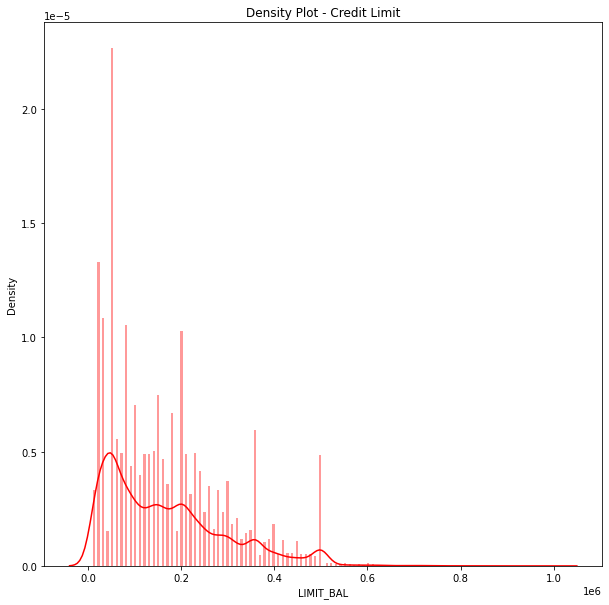

In [10]:
plt.figure(figsize = (10,10))
plt.title('Density Plot - Credit Limit')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="red")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

#### Checking for input variables with zero variance

In [12]:
from sklearn.feature_selection import VarianceThreshold
vr = VarianceThreshold(threshold=0)
vr.fit(df._get_numeric_data())
vr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### Credit limit vs Sex

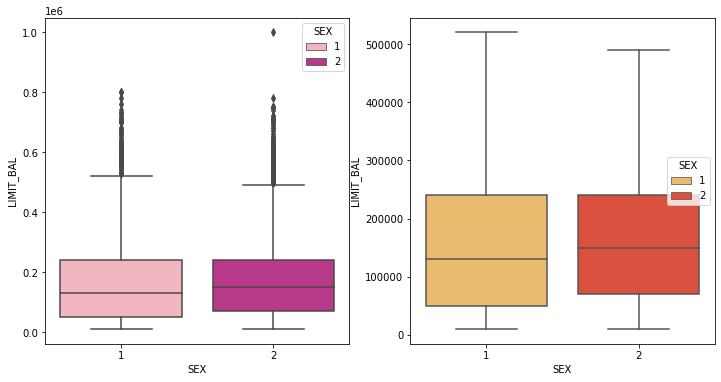

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="RdPu",showfliers=True, dodge = False)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="YlOrRd",showfliers=False, dodge = False)
plt.show();

#### Data unbalance

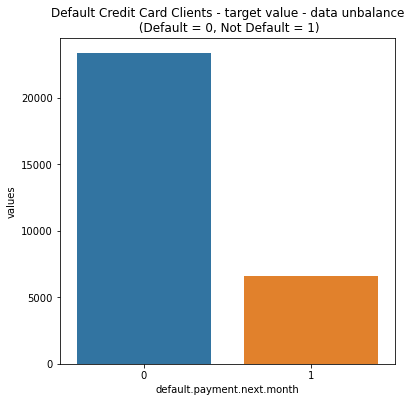

In [14]:
temp = df["default.payment.next.month"].value_counts()
df_new = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df_new)
locs, labels = plt.xticks()
plt.show()

#### default.payment.next.month distribution

In [15]:
default_no = len(df[df['default.payment.next.month'] == 0])/df.shape[0]
default = len(df[df['default.payment.next.month'] == 1])/df.shape[0]
print("Percentage of defaulter in dataset: {}%".format(round(default*100,2)))
print("Percentage of not defaulter in dataset: {}%".format(round(default_no*100,2)))

Percentage of defaulter in dataset: 22.12%
Percentage of not defaulter in dataset: 77.88%


* Data is not highly unbalanced with respect to independent variable default.payment.next.month

* Credit card limit amount is almost same between sexes. Male have slightly smaller q1 and q3. Mean limit amount for male is lower than female.

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

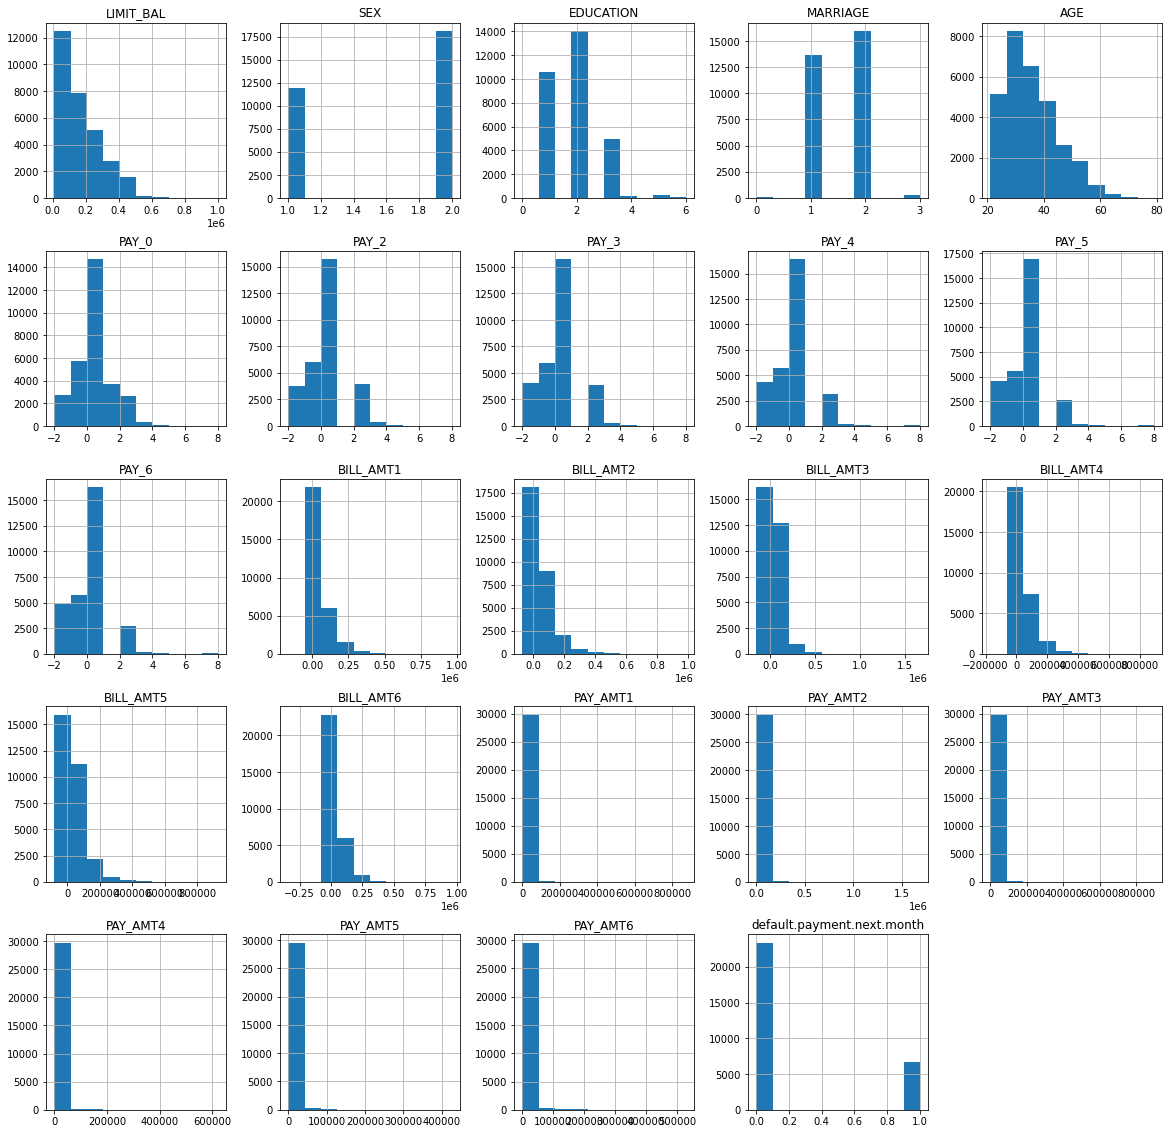

In [16]:
df.hist(figsize=(20,20))

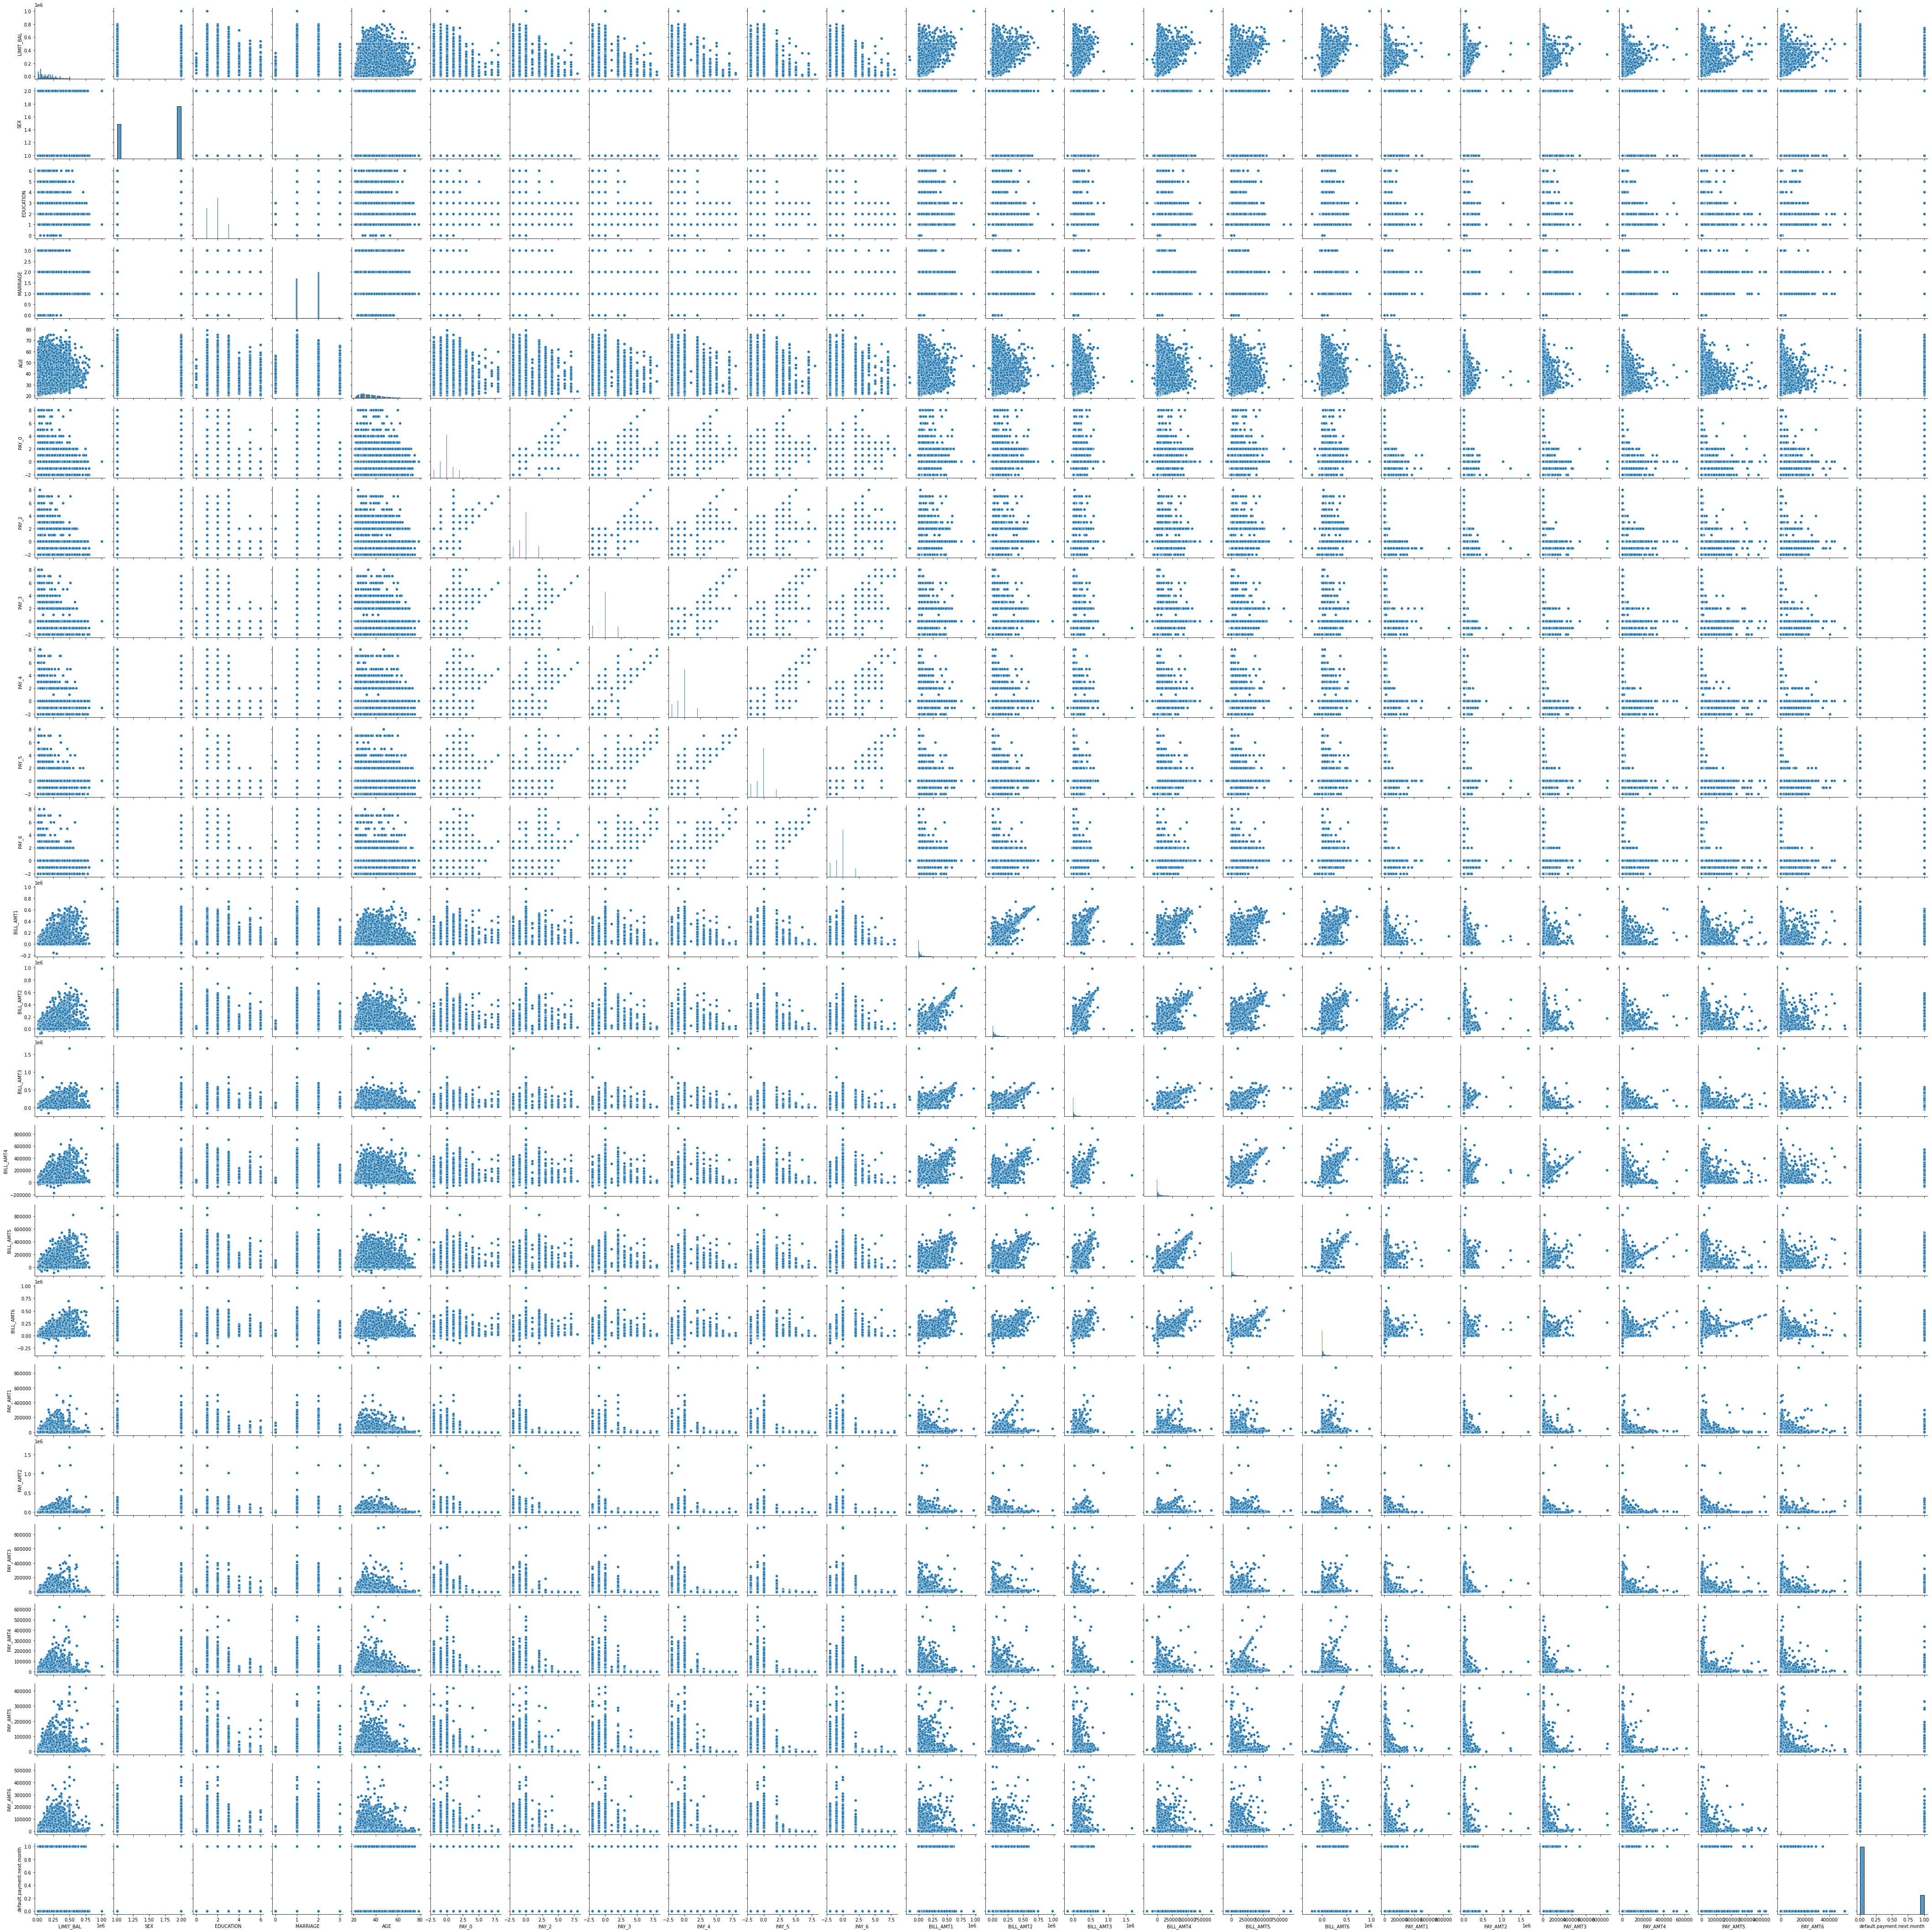

In [17]:
sns.pairplot(df.loc[:,df._get_numeric_data().columns.values], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [18]:
### Separating input and target variables
x = df.drop(labels='default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

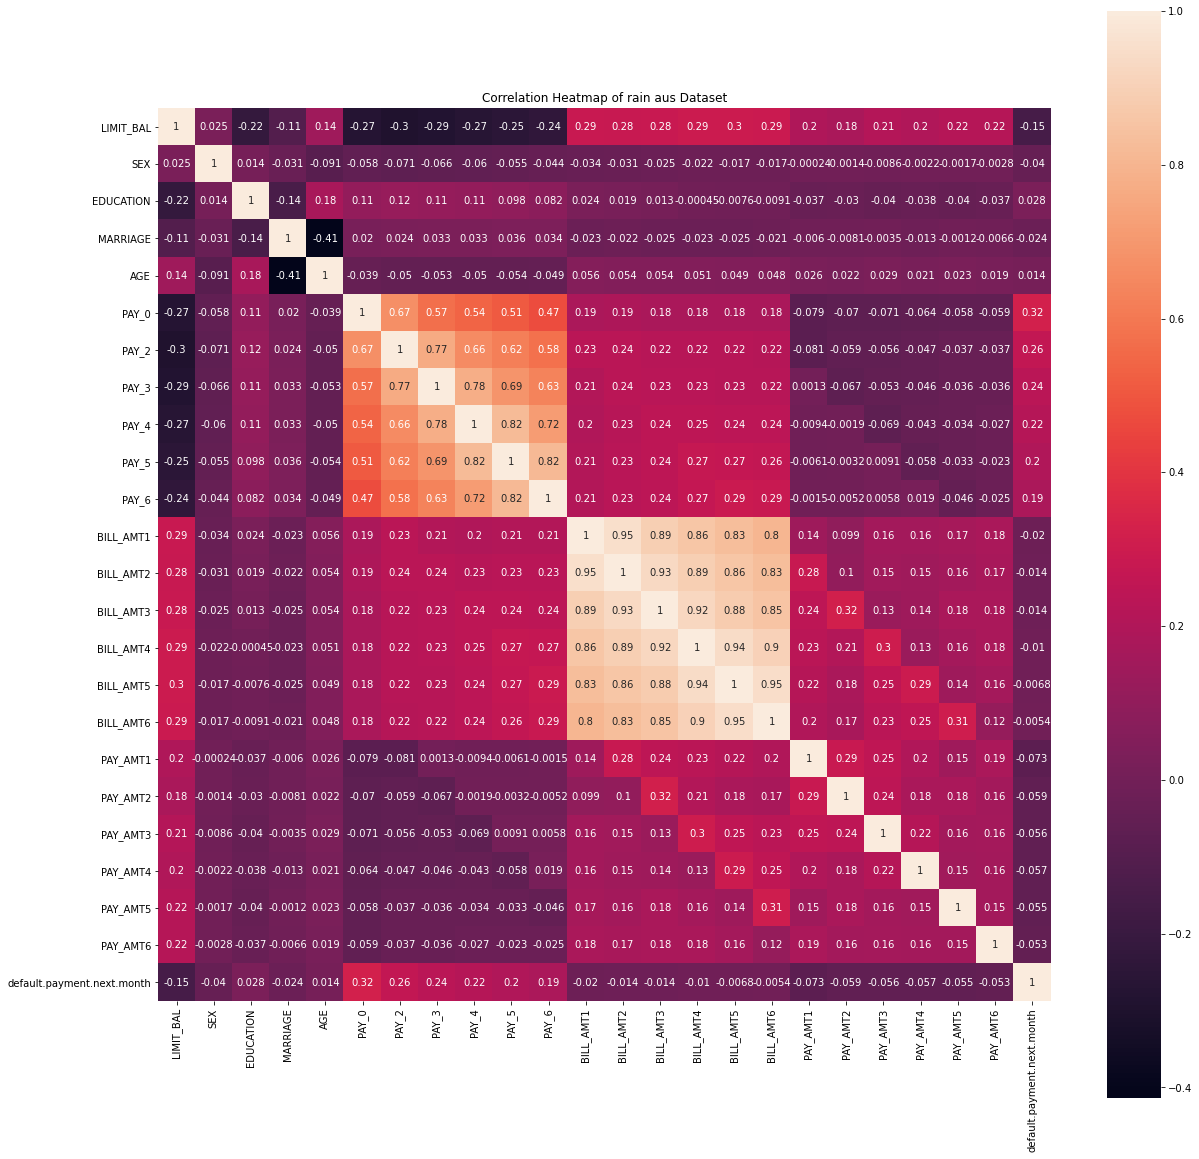

In [19]:
cor = df.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap of rain aus Dataset')
sns.heatmap(cor, annot=True, square=True, linecolor='black')
plt.show()

In [20]:
p = pd.DataFrame(np.triu(cor,k = 1))
high_corr_col = [col for col in p.columns if any(p[col] > 0.9) ]
high_corr_col

[12, 13, 14, 15, 16]

In [21]:
p.iloc[:, 10:]

10        11        12        13        14        15        16  \
0  -0.235195  0.285430  0.278314  0.283236  0.293988  0.295562  0.290389   
1  -0.044008 -0.033642 -0.031183 -0.024563 -0.021880 -0.017005 -0.016733   
2   0.082316  0.023581  0.018749  0.013002 -0.000451 -0.007567 -0.009099   
3   0.034345 -0.023472 -0.021602 -0.024909 -0.023344 -0.025393 -0.021207   
4  -0.048773  0.056239  0.054283  0.053710  0.051353  0.049345  0.047613   
5   0.474553  0.187068  0.189859  0.179785  0.179125  0.180635  0.176980   
6   0.575501  0.234887  0.235257  0.224146  0.222237  0.221348  0.219403   
7   0.632684  0.208473  0.237295  0.227494  0.227202  0.225145  0.222327   
8   0.716449  0.202812  0.225816  0.244983  0.245917  0.242902  0.239154   
9   0.816900  0.206684  0.226913  0.243335  0.271915  0.269783  0.262509   
10  0.000000  0.207373  0.226924  0.241181  0.266356  0.290894  0.285091   
11  0.000000  0.000000  0.951484  0.892279  0.860272  0.829779  0.802650   
12  0.000000  0.000000  0.000000  0.928326  0.892482  0.859778  0.831594   
13  0.000000  0.000000  0.000000  0.000000  0.923969  0.883910  0.853320   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.940134  0.900941   
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.946197   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          17        18        19        20        21        22        23  
0   0.195236  0.178408  0.210167  0.203242  0.217202  0.219595 -0.153520  
1  -0.000242 -0.001391 -0.008597 -0.002229 -0.001667 -0.002766 -0.039961  
2  -0.037456 -0.030038 -0.039943 -0.038218 -0.040358 -0.037200  0.028006  
3  -0.005979 -0.008093 -0.003541 -0.012659 -0.001205 -0.006641 -0.024339  
4   0.026147  0.021785  0.029247  0.021379  0.022850  0.019478  0.013890  
5  -0.079269 -0.070101 -0.070561 -0.064005 -0.058190 -0.058673  0.324794  
6  -0.080701 -0.058990 -0.055901 -0.046858 -0.037093 -0.036500  0.263551  
7   0.001295 -0.066793 -0.053311 -0.046067 -0.035863 -0.035861  0.235253  
8  -0.009362 -0.001944 -0.069235 -0.043461 -0.033590 -0.026565  0.216614  
9  -0.006089 -0.003191  0.009062 -0.058299 -0.033337 -0.023027  0.204149  
10 -0.001496 -0.005223  0.005834  0.019018 -0.046434 -0.025299  0.186866  
11  0.140277  0.099355  0.156887  0.158303  0.167026  0.179341 -0.019644  
12  0.280365  0.100851  0.150718  0.147398  0.157957  0.174256 -0.014193  
13  0.244335  0.316936  0.130011  0.143405  0.179712  0.182326 -0.014076  
14  0.233012  0.207564  0.300023  0.130191  0.160433  0.177637 -0.010156  
15  0.217031  0.181246  0.252305  0.293118  0.141574  0.164184 -0.006760  
16  0.199965  0.172663  0.233770  0.250237  0.307729  0.115494 -0.005372  
17  0.000000  0.285576  0.252191  0.199558  0.148459  0.185735 -0.072929  
18  0.000000  0.000000  0.244770  0.180107  0.180908  0.157634 -0.058579  
19  0.000000  0.000000  0.000000  0.216325  0.159214  0.162740 -0.056250  
20  0.000000  0.000000  0.000000  0.000000  0.151830  0.157834 -0.056827  
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.154896 -0.055124  
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -0.053183  
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

In [22]:
cor

LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.021602   
BILL_AMT3                    0.283236 -0.024563   0.013002 -0.024909   
BILL_AMT4                    0.293988 -0.021880  -0.000451 -0.023344   
BILL_AMT5                    0.295562 -0.017005  -0.007567 -0.025393   
BILL_AMT6                    0.290389 -0.016733  -0.009099 -0.021207   
PAY_AMT1                     0.195236 -0.000242  -0.037456 -0.005979   
PAY_AMT2                     0.178408 -0.001391  -0.030038 -0.008093   
PAY_AMT3                     0.210167 -0.008597  -0.039943 -0.003541   
PAY_AMT4                     0.203242 -0.002229  -0.038218 -0.012659   
PAY_AMT5                     0.217202 -0.001667  -0.040358 -0.001205   
PAY_AMT6                     0.219595 -0.002766  -0.037200 -0.006641   
default.payment.next.month  -0.153520 -0.039961   0.028006 -0.024339   

                                 AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
LIMIT_BAL                   0.144713 -0.271214 -0.296382 -0.286123 -0.267460   
SEX                        -0.090874 -0.057643 -0.070771 -0.066096 -0.060173   
EDUCATION                   0.175061  0.105364  0.121566  0.114025  0.108793   
MARRIAGE                   -0.414170  0.019917  0.024199  0.032688  0.033122   
AGE                         1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0                      -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2                      -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3                      -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4                      -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5                      -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6                      -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1                   0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2                   0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3                   0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4                   0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5                   0.049345  0.180635  0.221348  0.225145  0.242902   
BILL_AMT6                   0.047613  0.176980  0.219403  0.222327  0.239154   
PAY_AMT1                    0.026147 -0.079269 -0.080701  0.001295 -0.009362   
PAY_AMT2                    0.021785 -0.070101 -0.058990 -0.066793 -0.001944   
PAY_AMT3                    0.029247 -0.070561 -0.055901 -0.053311 -0.069235   
PAY_AMT4                    0.021379 -0.064005 -0.046858 -0.046067 -0.043461   
PAY_AMT5                    0.022850 -0.058190 -0.037093 -0.035863 -0.033590   
PAY_AMT6                    0.019478 -0.058673 -0.036500 -0.035861 -0.026565   
default.payment.next.month  0.013890  0.324794  0.263551  0.235253  0.216614   

                               PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
LIMIT_BAL                  -0.249411  ...   0.293988   0.295562   0.290389   
SEX                        -0.055064  ...  -0.021880  -0.017005  -0.01

In [23]:
x.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype=object)

In [24]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled  = scale.fit_transform(x)
x_scaled
input_scaled = pd.DataFrame(x_scaled, columns=x.columns.values )

In [25]:
input_scaled

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0      -1.136720  0.810161   0.185828 -1.057295 -1.246020  1.794564  1.782348   
1      -0.365981  0.810161   0.185828  0.858557 -1.029047 -0.874991  1.782348   
2      -0.597202  0.810161   0.185828  0.858557 -0.161156  0.014861  0.111736   
3      -0.905498  0.810161   0.185828 -1.057295  0.164303  0.014861  0.111736   
4      -0.905498 -1.234323   0.185828 -1.057295  2.334029 -0.874991  0.111736   
...          ...       ...        ...       ...       ...       ...       ...   
29995   0.404759 -1.234323   1.451114 -1.057295  0.381275  0.014861  0.111736   
29996  -0.134759 -1.234323   1.451114  0.858557  0.815221 -0.874991 -0.723570   
29997  -1.059646 -1.234323   0.185828  0.858557  0.164303  3.574267  2.617654   
29998  -0.674276 -1.234323   1.451114 -1.057295  0.598248  0.904712 -0.723570   
29999  -0.905498 -1.234323   0.185828 -1.057295  1.140680  0.014861  0.111736   

          PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -0.696663 -0.666599 -1.530046  ...  -0.667993  -0.672497  -0.663059   
1      0.138865  0.188746  0.234917  ...  -0.639254  -0.621636  -0.606229   
2      0.138865  0.188746  0.234917  ...  -0.482408  -0.449730  -0.417188   
3      0.138865  0.188746  0.234917  ...   0.032846  -0.232373  -0.186729   
4     -0.696663  0.188746  0.234917  ...  -0.161189  -0.346997  -0.348137   
...         ...       ...       ...  ...        ...        ...        ...   
29995  0.138865  0.188746  0.234917  ...   2.326690   0.695474  -0.149259   
29996 -0.696663 -0.666599  0.234917  ...  -0.627430  -0.532924  -0.577691   
29997  1.809921 -0.666599  0.234917  ...  -0.638158  -0.347961  -0.324517   
29998  0.138865  0.188746  0.234917  ...   0.422373   0.147844  -0.468063   
29999  0.138865  0.188746  0.234917  ...   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      -0.652724 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
1      -0.597966 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
2      -0.391630 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
3      -0.156579 -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
4      -0.331482 -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187  
...          ...       ...       ...       ...       ...       ...       ...  
29995  -0.384392  0.171250  0.611048 -0.012648 -0.113564  0.013131 -0.237130  
29996  -0.652724 -0.231032 -0.103955  0.214255 -0.299828 -0.314136 -0.293382  
29997  -0.327687 -0.341942 -0.256990  0.952725 -0.039964 -0.183229 -0.119001  
29998   0.169130  4.844316 -0.109033 -0.229895 -0.185120  3.152536 -0.191904  
29999  -0.395592 -0.216481 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130  

[30000 rows x 23 columns]

### Applying PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statistics

Number of components: 23


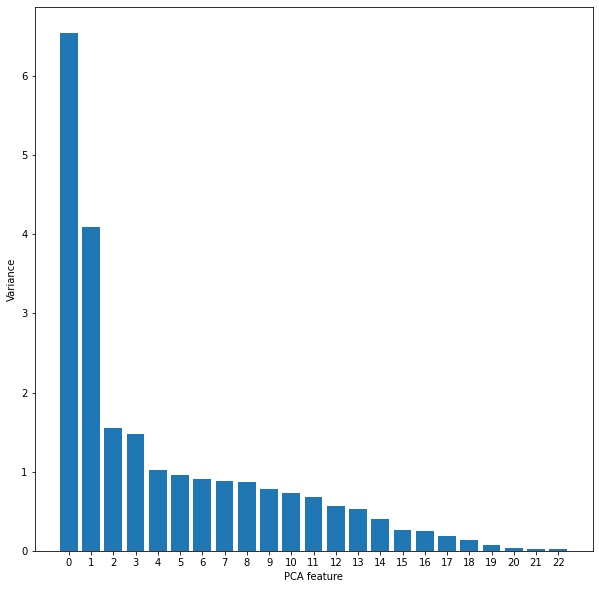

In [27]:
pca = PCA()

pca.fit(x_scaled)
print("Number of components: {}".format(pca.n_components_))
# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(10,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)

plt.show()

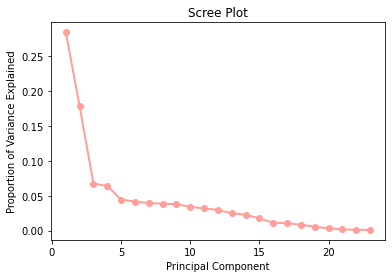

In [28]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [29]:
pca = PCA(n_components=4)

# Fit the PCA instance to the scaled samples
pca.fit(x_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(x_scaled)

# Print the shape of pca_features
print("PCA Features Shape \n",pca_features.shape)

print("PCA Features \n", pca_features[1:10,:])

PCA Features Shape 
 (30000, 4)
PCA Features 
 [[-0.764696   -2.10929384  1.09698485 -0.48427232]
 [-0.84740788 -1.07217868  0.41243591 -0.43334811]
 [-0.19658912 -0.80902994 -0.82002128  0.29130891]
 [-0.8409348  -0.07254963 -1.00766767  2.32609394]
 [-0.18374    -0.83996767  0.35711508 -0.74904127]
 [14.10574206  7.06053856  0.32405789 -2.48152039]
 [-1.85699032 -0.5319002   0.83587492 -1.11899578]
 [-0.66088276 -1.70549196 -0.4394776   0.6172682 ]
 [-2.826604    1.28771866 -0.3581972  -0.37841906]]


In [30]:
print(pca.components_)

[[ 0.06851881 -0.02165655  0.01920594 -0.0056001   0.01423145  0.16108284
   0.19411931  0.20021231  0.20703795  0.21096069  0.20641288  0.33438498
   0.34579687  0.34977705  0.35388322  0.35175249  0.34451451  0.09423125
   0.07868085  0.086394    0.07779262  0.07535449  0.06994824]
 [ 0.31632867  0.03059311 -0.09151724 -0.04324838  0.06657689 -0.29810978
  -0.33482658 -0.34390554 -0.3445854  -0.33159666 -0.30578623  0.13981298
   0.14022505  0.14621237  0.1454499   0.14376216  0.14187401  0.14910968
   0.13987136  0.1515672   0.14140759  0.13719144  0.12939783]
 [ 0.01818427  0.0237884  -0.31572644  0.45379685 -0.46269364 -0.01577966
   0.01709913  0.06025026  0.08834138  0.10911751  0.11179221 -0.15104722
  -0.12722913 -0.08399715 -0.07048855 -0.05641318 -0.04731397  0.28172953
   0.3016775   0.27981239  0.23710874  0.19440694  0.20948822]
 [ 0.07068391 -0.07852044  0.2472472  -0.44397221  0.46238626  0.0177523
   0.04903133  0.08290308  0.10904767  0.11610493  0.11073271 -0.1682680

In [31]:
print(pca.explained_variance_)

[6.54330745 4.0984645  1.55097556 1.47228273]


In [32]:
from sklearn.model_selection import train_test_split
train_x_pca, test_x_pca, y_train_pca, test_y_pca = train_test_split(pca_features, y, test_size = 0.3, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

li = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solvers_accuracy = {}
lr = None
for v in li:
    lr = LogisticRegression(C = 0.01, solver=v)
    lr = lr.fit(train_x_pca, y_train_pca)
    pred = lr.predict(test_x_pca)
    
    solvers_accuracy.update({v:round(metrics.accuracy_score(test_y_pca, pred), 2)})



In [34]:
solvers_accuracy

{'newton-cg': 0.8, 'lbfgs': 0.8, 'liblinear': 0.79, 'sag': 0.8, 'saga': 0.8}

In [35]:
lg = LogisticRegression(C = 0.01, solver='liblinear')
lg.fit(train_x_pca, y_train_pca.values.ravel())
y_pred = lg.predict(test_x_pca)
conf_metr = metrics.confusion_matrix(test_y_pca, y_pred)
conf_metr

array([[6872,  168],
       [1684,  276]], dtype=int64)

In [36]:
res = cross_val_score(lg, train_x_pca, y_train_pca.values.ravel(), cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.7972857142857144, SD: 0.004283067966051203


In [37]:
print("Mean and Standard deviation of cross value score: {} , {}".format(sum(res)/len(res), statistics.stdev(res)) )

Mean and Standard deviation of cross value score: 0.7972857142857144 , 0.004283067966051203


In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
print('ROC AUC score on train set: {}'.format(roc_auc_score(y_train_pca, lg.predict(train_x_pca))))
print('ROC AUC score on test set: {}'.format(roc_auc_score(test_y_pca, lg.predict(test_x_pca))))

ROC AUC score on train set: 0.5690057033690522
ROC AUC score on test set: 0.5584763450834879


In [40]:
conf_metr_lg_PCA = metrics.confusion_matrix(test_y_pca, lg.predict(test_x_pca))
conf_metr_lg_PCA

array([[6872,  168],
       [1684,  276]], dtype=int64)

In [41]:
print("Recall or Sensitivity : {}".format((conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,0]))))
print("Specificity: {}".format((conf_metr_lg_PCA[1,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]))))
print("Precision: {}".format((conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_lg_PCA[0,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]))))

Recall or Sensitivity : 0.8031790556334736
Specificity: 0.6216216216216216
Precision: 0.9761363636363637
True nPositive Rate: 0.8031790556334736
Fale Positive Rate: 0.3783783783783784


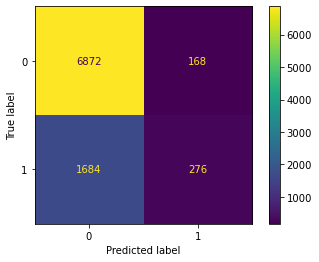

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lg, test_x_pca, test_y_pca) 
plt.show() 

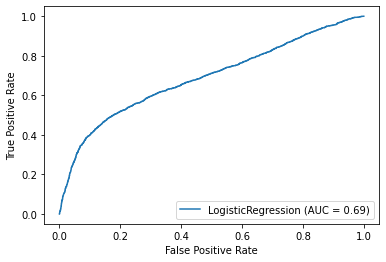

In [43]:
metrics.plot_roc_curve(lg, test_x_pca, test_y_pca)

### Varying thresholds

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
lg_threshold = LogisticRegression(class_weight="balanced")
lg_threshold.fit(train_x_pca, y_train_pca.values.ravel())
lst_df = []
THRESHOLD = 0.5
for i in range(3):
    preds = np.where(lg_threshold.predict_proba(test_x_pca)[:,1] > THRESHOLD, 1, 0)
    conf_metr_lg_PCA_thr = metrics.confusion_matrix(test_y_pca, preds)

    plt.show() 

    df = pd.DataFrame(data={'{} threshold'.format(THRESHOLD):[((conf_metr_lg_PCA_thr[0,0]+conf_metr_lg_PCA_thr[1,1])/(conf_metr_lg_PCA_thr[0,0]+conf_metr_lg_PCA_thr[1,0]+conf_metr_lg_PCA_thr[0,1]+conf_metr_lg_PCA_thr[1,1])), (conf_metr_lg_PCA_thr[0,0]/(conf_metr_lg_PCA_thr[0,0]+conf_metr_lg_PCA_thr[1,0])),
                       (conf_metr_lg_PCA_thr[0,0]/(conf_metr_lg_PCA_thr[0,0]+conf_metr_lg_PCA_thr[0,1])),(conf_metr_lg_PCA_thr[1,1]/(conf_metr_lg_PCA_thr[0,1]+conf_metr_lg_PCA_thr[1,1])),roc_auc_score(test_y_pca, lg_threshold.predict(test_x_pca)) ]}, 
                 index=["accuracy", "recall", "precision",'specificity', "roc_auc_score"])
    lst_df.append(df)
    THRESHOLD = THRESHOLD + 0.1
df1 = lst_df[0]
for i in range(1,3):
        df1 = pd.concat([df1,lst_df[i]], axis = 1)
print(df1)

               0.5 threshold  0.6 threshold  0.7 threshold
accuracy            0.631333       0.788556       0.799889
recall              0.861500       0.843612       0.814957
precision           0.629972       0.895739       0.962784
specificity         0.323728       0.518689       0.616398
roc_auc_score       0.633098       0.633098       0.633098


In [45]:
THRESHOLD = 0.7
lg_threshold.fit(train_x_pca, y_train_pca.values.ravel())
preds = np.where(lg_threshold.predict_proba(test_x_pca)[:,1] > THRESHOLD, 1, 0)
conf_metr_lg_PCA_thr = metrics.confusion_matrix(test_y_pca, preds)
conf_metr_lg_PCA_thr


array([[6778,  262],
       [1539,  421]], dtype=int64)

In [46]:
roc_auc_score(test_y_pca, preds)

0.5887900046382188

In [47]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_y_pca, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_pca.ravel(), preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

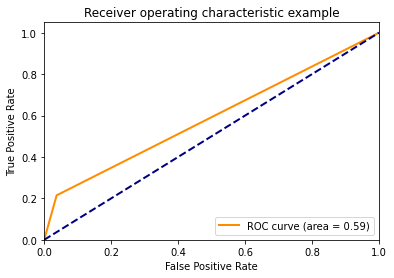

In [48]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###  ----------------------------------------

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=1000)
rf.fit(train_x_pca, y_train_pca)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=0)

In [50]:
round(metrics.accuracy_score(test_y_pca, rf.predict(test_x_pca)), 2)

0.8

In [51]:
res = cross_val_score(rf, train_x_pca, y_train_pca, cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8042857142857143, SD: 0.006867716715169515


In [52]:
conf_metr_rf_pca = metrics.confusion_matrix(test_y_pca, rf.predict(test_x_pca))
conf_metr_rf_pca

array([[6688,  352],
       [1433,  527]], dtype=int64)

In [53]:
print("Recall or specificity: {}".format((conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,0]))))
print("Sensitivity: {}".format((conf_metr_lg_PCA[1,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]))))
print("Precision: {}".format((conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_rf_pca[0,1]/(conf_metr_rf_pca[0,1]+conf_metr_rf_pca[1,1]))))

Recall or specificity: 0.8235438985346633
Sensitivity: 0.6216216216216216
Precision: 0.95
True nPositive Rate: 0.8235438985346633
Fale Positive Rate: 0.4004550625711035


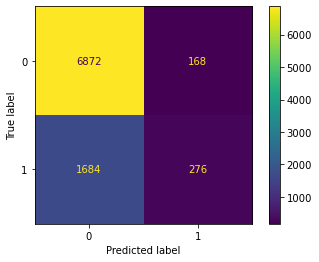

In [54]:
plot_confusion_matrix(lg, test_x_pca, test_y_pca) 
plt.show() 

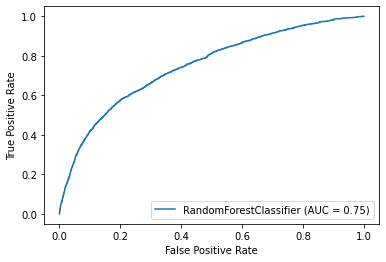

In [55]:
metrics.plot_roc_curve(rf, test_x_pca, test_y_pca)

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

### Dont run below code. It will lot of time. Built model using best params down in 59th cell.

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x_pca, y_train_pca)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

pd.DataFrame(rf_random.cv_results_)

In [73]:
rf_random.best_score_

0.8059523809523809

In [75]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [59]:
rf_1 = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf = 2, max_features='sqrt', bootstrap=True, n_estimators=1000)
rf_1.fit(train_x_pca, y_train_pca)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000)

In [60]:
conf_metr_rf_pca_tuned = metrics.confusion_matrix(test_y_pca, rf_1.predict(test_x_pca))
conf_metr_rf_pca_tuned

array([[6678,  362],
       [1399,  561]], dtype=int64)

In [61]:
res = cross_val_score(rf_1, train_x_pca, y_train_pca, cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8047142857142857, SD: 0.006210590034081184


In [62]:
print("Recall or Sensitivity: {}".format((conf_metr_rf_pca_tuned[0,0]/(conf_metr_rf_pca_tuned[0,0]+conf_metr_rf_pca_tuned[1,0]))))
print("specificity: {}".format((conf_metr_rf_pca_tuned[1,1]/(conf_metr_rf_pca_tuned[0,1]+conf_metr_rf_pca_tuned[1,1]))))
print("Precision: {}".format((conf_metr_rf_pca_tuned[0,0]/(conf_metr_rf_pca_tuned[0,0]+conf_metr_rf_pca_tuned[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_rf_pca_tuned[0,0]/(conf_metr_rf_pca_tuned[0,0]+conf_metr_rf_pca_tuned[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_rf_pca_tuned[0,1]/(conf_metr_rf_pca_tuned[0,1]+conf_metr_rf_pca_tuned[1,1]))))

Recall or Sensitivity: 0.8267921257892782
specificity: 0.6078006500541712
Precision: 0.9485795454545455
True nPositive Rate: 0.8267921257892782
Fale Positive Rate: 0.39219934994582883


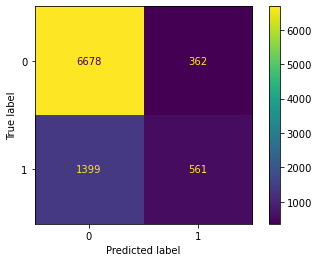

In [63]:
plot_confusion_matrix(rf_1, test_x_pca, test_y_pca) 
plt.show() 

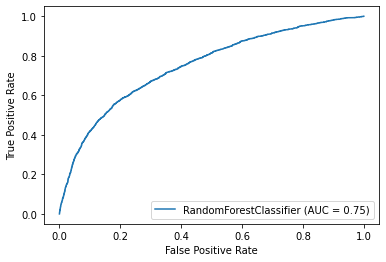

In [64]:
metrics.plot_roc_curve(rf_1, test_x_pca, test_y_pca)

### K Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for i in range(1, Ks, 1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(train_x_pca, y_train_pca)
    pred = knn_model.predict(test_x_pca)
    print("k:{} accuracy:{}".format(i, round(metrics.accuracy_score(test_y_pca, pred), 3)))
    mean_acc[i-1] = metrics.accuracy_score(test_y_pca, pred)
    std_acc[i-1]=np.std(pred==test_y_pca)/np.sqrt(pred.shape[0])
    
mean_acc  

k:1 accuracy:0.725
k:2 accuracy:0.781
k:3 accuracy:0.768
k:4 accuracy:0.786
k:5 accuracy:0.779
k:6 accuracy:0.791
k:7 accuracy:0.788
k:8 accuracy:0.796
k:9 accuracy:0.793
k:10 accuracy:0.798
k:11 accuracy:0.797
k:12 accuracy:0.8
k:13 accuracy:0.799
k:14 accuracy:0.8
k:15 accuracy:0.799
k:16 accuracy:0.8
k:17 accuracy:0.8
k:18 accuracy:0.801
k:19 accuracy:0.802
k:20 accuracy:0.8
k:21 accuracy:0.803
k:22 accuracy:0.802
k:23 accuracy:0.804
k:24 accuracy:0.802
k:25 accuracy:0.805
k:26 accuracy:0.804
k:27 accuracy:0.803
k:28 accuracy:0.804
k:29 accuracy:0.804


array([0.72511111, 0.78066667, 0.76788889, 0.78588889, 0.77944444,
       0.791     , 0.78833333, 0.79577778, 0.793     , 0.79844444,
       0.79655556, 0.79966667, 0.79866667, 0.80022222, 0.79922222,
       0.80011111, 0.80022222, 0.801     , 0.80211111, 0.80044444,
       0.80255556, 0.80244444, 0.80422222, 0.80233333, 0.80455556,
       0.80355556, 0.80322222, 0.80377778, 0.804     ])

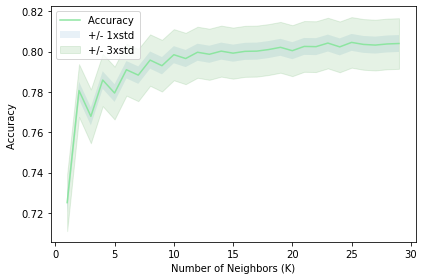

In [66]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(train_x_pca, y_train_pca)
pred = knn_model.predict(test_x_pca)

In [68]:
conf_metr_knn_pca_tuned = metrics.confusion_matrix(test_y_pca, knn_model.predict(test_x_pca))
conf_metr_knn_pca_tuned

array([[6648,  392],
       [1370,  590]], dtype=int64)

In [69]:
res = cross_val_score(knn_model, train_x_pca, y_train_pca , cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8026190476190477, SD: 0.007734736755914562


In [70]:
print("Recall or Sensitivity: {}".format((conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,0]))))
print("specificity: {}".format((conf_metr_lg_PCA[1,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]))))
print("Precision: {}".format((conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_knn_pca_tuned[0,1]/(conf_metr_knn_pca_tuned[0,1]+conf_metr_knn_pca_tuned[1,1]))))

Recall or Sensitivity: 0.8291344474931405
specificity: 0.6216216216216216
Precision: 0.9443181818181818
True nPositive Rate: 0.8291344474931405
Fale Positive Rate: 0.39918533604887985


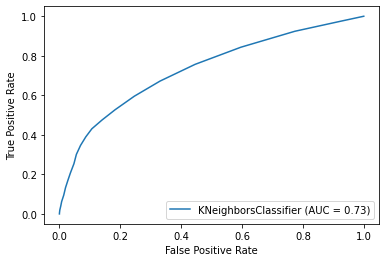

In [71]:
metrics.plot_roc_curve(knn_model, test_x_pca, test_y_pca)

In [72]:
dataFrame = pd.DataFrame(data = {'LogisticRegression': [conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,0]), conf_metr_lg_PCA[1,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]), conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[0,1]), conf_metr_lg_PCA[0,0]/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,0]), conf_metr_lg_PCA[0,1]/(conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]), ((conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,1])/(conf_metr_lg_PCA[0,0]+conf_metr_lg_PCA[1,0]+conf_metr_lg_PCA[0,1]+conf_metr_lg_PCA[1,1]))], 'RandomForest': [conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,0]), conf_metr_rf_pca[1,1]/(conf_metr_rf_pca[0,1]+conf_metr_rf_pca[1,1]), conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[0,1]), conf_metr_rf_pca[0,0]/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,0]), conf_metr_rf_pca[0,1]/(conf_metr_rf_pca[0,1]+conf_metr_rf_pca[1,1]), ((conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,1])/(conf_metr_rf_pca[0,0]+conf_metr_rf_pca[1,0]+conf_metr_rf_pca[0,1]+conf_metr_rf_pca[1,1]))], 'KNN':[conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,0]), conf_metr_knn_pca_tuned[1,1]/(conf_metr_knn_pca_tuned[0,1]+conf_metr_knn_pca_tuned[1,1]), conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[0,1]), conf_metr_knn_pca_tuned[0,0]/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,0]), conf_metr_knn_pca_tuned[0,1]/(conf_metr_knn_pca_tuned[0,1]+conf_metr_knn_pca_tuned[1,1]), ((conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,1])/(conf_metr_knn_pca_tuned[0,0]+conf_metr_knn_pca_tuned[1,0]+conf_metr_knn_pca_tuned[0,1]+conf_metr_knn_pca_tuned[1,1]))]})

dataFrame.index = ['Recall', 'Specificity', 'Precision', 'True Positive Rate', 'False Positive Rate', 'Accuracy']

dataFrame

LogisticRegression  RandomForest       KNN
Recall                         0.803179      0.823544  0.829134
Specificity                    0.621622      0.599545  0.600815
Precision                      0.976136      0.950000  0.944318
True Positive Rate             0.803179      0.823544  0.829134
False Positive Rate            0.378378      0.400455  0.399185
Accuracy                       0.794222      0.801667  0.804222

### Without PCA

In [73]:
from sklearn.model_selection import train_test_split
train_x, test_x, y_train, test_y = train_test_split(input_scaled, y, test_size = 0.3, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
li = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solvers_accuracy = {}
lr = None
for v in li:
    lr = LogisticRegression(C = 0.01, solver=v)
    lr = lr.fit(train_x, y_train)
    pred = lr.predict(test_x)
    
    solvers_accuracy.update({v:round(metrics.accuracy_score(test_y, pred), 2)})



C:\Users\sachi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [75]:
solvers_accuracy

{'newton-cg': 0.81,
 'lbfgs': 0.81,
 'liblinear': 0.81,
 'sag': 0.81,
 'saga': 0.81}

In [76]:
lg = LogisticRegression(C = 0.01, solver='liblinear')
lg.fit(train_x, y_train.values.ravel())
y_pred = lg.predict(test_x)
conf_metr = metrics.confusion_matrix(test_y, y_pred)
conf_metr

array([[6827,  213],
       [1509,  451]], dtype=int64)

In [77]:
res = cross_val_score(lg, train_x, y_train, cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8106190476190477, SD: 0.003978083065090995


In [78]:
print("Recall: {}".format((conf_metr[0,0]/(conf_metr[0,0]+conf_metr[1,0]))))
print("specificity: {}".format((conf_metr[1,1]/(conf_metr[0,1]+conf_metr[1,1]))))
print("Precision: {}".format((conf_metr[0,0]/(conf_metr[0,0]+conf_metr[0,1]))))

print("True nPositive Rate: {}".format((conf_metr[0,0]/(conf_metr[0,0]+conf_metr[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr[0,1]/(conf_metr[0,1]+conf_metr[1,1]))))

Recall: 0.8189779270633397
specificity: 0.6792168674698795
Precision: 0.9697443181818182
True nPositive Rate: 0.8189779270633397
Fale Positive Rate: 0.3207831325301205


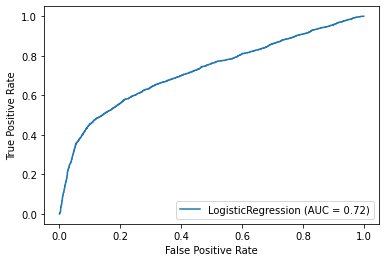

In [79]:
metrics.plot_roc_curve(lg, test_x, test_y)

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=1000)
rf.fit(train_x,y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=0)

In [81]:
pre_rf = rf.predict(test_x)

In [82]:
round(metrics.accuracy_score(test_y, pre_rf), 2)

0.82

In [83]:
mean = cross_val_score(rf, train_x, y_train, cv=10)

In [84]:
print('Mean: {}, SD: {}'.format(sum(mean)/len(mean), statistics.stdev(mean)))

Mean: 0.8203809523809523, SD: 0.0065707384040610845


In [85]:
pred_rf = rf.predict(test_x)
round(metrics.accuracy_score(test_y, pred_rf), 2)

0.82

In [86]:
conf_metr_rf = metrics.confusion_matrix(test_y, pred_rf)
conf_metr_rf

array([[6699,  341],
       [1272,  688]], dtype=int64)

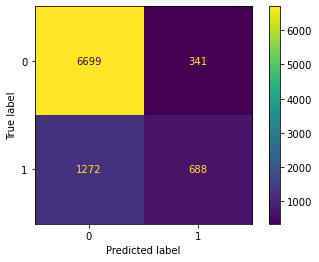

In [87]:
plot_confusion_matrix(rf, test_x, test_y) 
plt.show() 

In [88]:
print("Recall or sensitivity: {}".format((conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[1,0]))))

print("Specificity: {}".format((conf_metr_rf[1,1]/(conf_metr_rf[0,1]+conf_metr_rf[1,1]))))

print("Precision: {}".format((conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_rf[0,1]/(conf_metr_rf[0,1]+conf_metr_rf[1,1]))))

Recall or sensitivity: 0.8404215280391419
Specificity: 0.6686103012633625
Precision: 0.9515625
True nPositive Rate: 0.8404215280391419
Fale Positive Rate: 0.33138969873663754


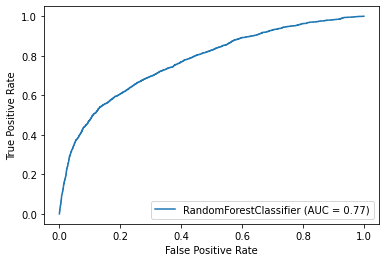

In [89]:
metrics.plot_roc_curve(rf, test_x, test_y)

In [90]:
rf.feature_importances_

array([0.03210567, 0.00257154, 0.00666294, 0.00356487, 0.01781394,
       0.2856909 , 0.14223997, 0.07858586, 0.06596283, 0.04657066,
       0.03666725, 0.02743102, 0.02409182, 0.02099693, 0.01970522,
       0.01951509, 0.01875722, 0.03972049, 0.02785727, 0.02570082,
       0.02024554, 0.01779831, 0.01974383])

<AxesSubplot:>

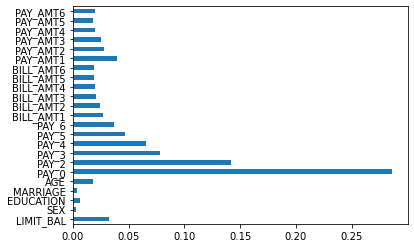

In [91]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.plot(kind='barh')

### Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(criterion='entropy', max_features='auto', max_depth=6)
cross_val_score(dt, train_x, y_train, cv=10)

array([0.82428571, 0.8152381 , 0.81857143, 0.81190476, 0.80571429,
       0.82      , 0.82      , 0.79619048, 0.80619048, 0.81571429])

[Text(162.16875, 201.90857142857143, 'X[6] <= 1.365\nentropy = 0.765\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(85.19464285714285, 170.84571428571428, 'X[5] <= 1.35\nentropy = 0.639\nsamples = 17876\nvalue = [14977, 2899]'),
 Text(47.82857142857143, 139.78285714285715, 'X[22] <= -0.24\nentropy = 0.591\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(23.914285714285715, 108.72, 'X[12] <= -0.685\nentropy = 0.711\nsamples = 6432\nvalue = [5181, 1251]'),
 Text(11.957142857142857, 77.65714285714284, 'X[11] <= -0.689\nentropy = 0.813\nsamples = 2137\nvalue = [1601, 536]'),
 Text(5.978571428571429, 46.59428571428572, 'X[4] <= -0.324\nentropy = 0.882\nsamples = 1434\nvalue = [1003, 431]'),
 Text(2.9892857142857143, 15.531428571428563, 'entropy = 0.787\nsamples = 561\nvalue = [429, 132]'),
 Text(8.967857142857143, 15.531428571428563, 'entropy = 0.927\nsamples = 873\nvalue = [574, 299]'),
 Text(17.935714285714287, 46.59428571428572, 'X[19] <= -0.265\nentropy = 0.608\nsamples = 703\nvalue =

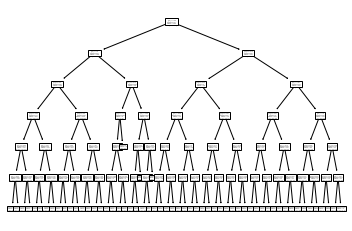

In [93]:
from sklearn import tree
dt.fit(train_x, y_train)
tree.plot_tree(dt) 

In [94]:
pred_dicision = dt.predict(test_x)

In [95]:
round(metrics.accuracy_score(test_y, pred_dicision), 2)

0.81

In [96]:
res = cross_val_score(dt, train_x, y_train, cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8128095238095238, SD: 0.00894103186966872


In [97]:
conf_metr_dt = metrics.confusion_matrix(test_y, pred_dicision)
conf_metr_dt

array([[6627,  413],
       [1278,  682]], dtype=int64)

In [98]:
print("Recall: {}".format((conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[1,0]))))

print("Precision: {}".format((conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_dt[0,1]/(conf_metr_dt[0,1]+conf_metr_dt[1,1]))))

Recall: 0.8383301707779887
Precision: 0.9413352272727272
True nPositive Rate: 0.8383301707779887
Fale Positive Rate: 0.3771689497716895


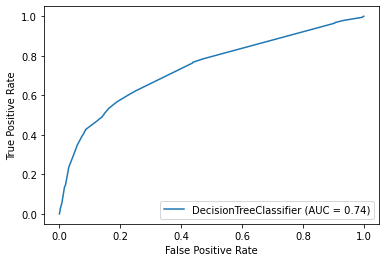

In [99]:
metrics.plot_roc_curve(dt, test_x, test_y)

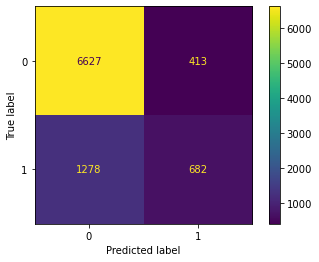

In [100]:
plot_confusion_matrix(dt, test_x, test_y) 
plt.show() 

### Adaboosting

In [101]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_clf.fit(train_x,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [102]:
pred_ada = adaboost_clf.predict(test_x)
round(metrics.accuracy_score(test_y, pred_ada), 2)

0.82

In [103]:
res = cross_val_score(adaboost_clf, train_x, y_train, cv=10)
print('Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Mean: 0.8169047619047618, SD: 0.006132204372089476


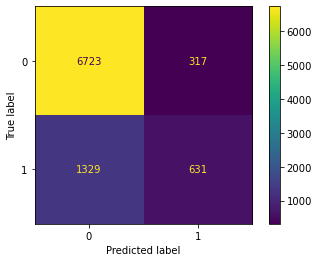

In [104]:
conf_metr_ada = metrics.confusion_matrix(test_y, pred_ada)
conf_metr_ada
plot_confusion_matrix(adaboost_clf, test_x, test_y) 
plt.show() 

In [105]:
print("Recall: {}".format((conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[1,0]))))

print("Precision: {}".format((conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[0,1]))))

print("True nPositive Rate: {}".format((conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[1,0]))))

print("Fale Positive Rate: {}".format((conf_metr_ada[0,1]/(conf_metr_ada[0,1]+conf_metr_ada[1,1]))))

Recall: 0.8349478390461997
Precision: 0.9549715909090909
True nPositive Rate: 0.8349478390461997
Fale Positive Rate: 0.33438818565400846


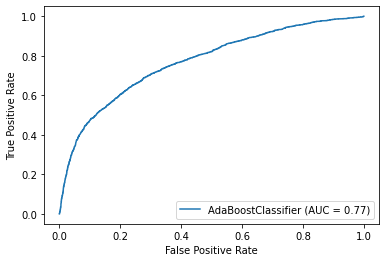

In [106]:
metrics.plot_roc_curve(adaboost_clf, test_x, test_y)

In [107]:
dataFrame = pd.DataFrame(data = {'LogisticRegression': [conf_metr[0,0]/(conf_metr[0,0]+conf_metr[1,0]), conf_metr[1,1]/(conf_metr[0,1]+conf_metr[1,1]), conf_metr[0,0]/(conf_metr[0,0]+conf_metr[0,1]), conf_metr[0,0]/(conf_metr[0,0]+conf_metr[1,0]), conf_metr[0,1]/(conf_metr[0,1]+conf_metr[1,1]), ((conf_metr[0,0]+conf_metr[1,1])/(conf_metr[0,0]+conf_metr[1,0]+conf_metr[0,1]+conf_metr[1,1]))], 'RandomForest': [conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[1,0]), conf_metr_rf[1,1]/(conf_metr_rf[0,1]+conf_metr_rf[1,1]), conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[0,1]), conf_metr_rf[0,0]/(conf_metr_rf[0,0]+conf_metr_rf[1,0]), conf_metr_rf[0,1]/(conf_metr_rf[0,1]+conf_metr_rf[1,1]), ((conf_metr_rf[0,0]+conf_metr_rf[1,1])/(conf_metr_rf[0,0]+conf_metr_rf[1,0]+conf_metr_rf[0,1]+conf_metr_rf[1,1]))], 'Ada boosting':[conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[1,0]), conf_metr_ada[1,1]/(conf_metr_ada[0,1]+conf_metr_ada[1,1]), conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[0,1]), conf_metr_ada[0,0]/(conf_metr_ada[0,0]+conf_metr_ada[1,0]), conf_metr_ada[0,1]/(conf_metr_ada[0,1]+conf_metr_ada[1,1]), ((conf_metr_ada[0,0]+conf_metr_ada[1,1])/(conf_metr_ada[0,0]+conf_metr_ada[1,0]+conf_metr_ada[0,1]+conf_metr_ada[1,1]))], 'Decision Tree':[conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[1,0]), conf_metr_dt[1,1]/(conf_metr_dt[0,1]+conf_metr_dt[1,1]), conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[0,1]), conf_metr_dt[0,0]/(conf_metr_dt[0,0]+conf_metr_dt[1,0]), conf_metr_dt[0,1]/(conf_metr_dt[0,1]+conf_metr_dt[1,1]), ((conf_metr_dt[0,0]+conf_metr_dt[1,1])/(conf_metr_dt[0,0]+conf_metr_dt[1,0]+conf_metr_dt[0,1]+conf_metr_dt[1,1]))]})

dataFrame.index = ['Recall', 'Specificity', 'Precision', 'True Positive Rate', 'False Positive Rate', 'Accuracy']

dataFrame

LogisticRegression  RandomForest  Ada boosting  \
Recall                         0.818978      0.840422      0.834948   
Specificity                    0.679217      0.668610      0.665612   
Precision                      0.969744      0.951562      0.954972   
True Positive Rate             0.818978      0.840422      0.834948   
False Positive Rate            0.320783      0.331390      0.334388   
Accuracy                       0.808667      0.820778      0.817111   

                     Decision Tree  
Recall                    0.838330  
Specificity               0.622831  
Precision                 0.941335  
True Positive Rate        0.838330  
False Positive Rate       0.377169  
Accuracy                  0.812111